# Assignment 4

Using data from this [FiveThirtyEight](http://fivethirtyeight.com/datalab/opinions-about-the-iran-deal-are-more-about-obama-than-iran/) post, write code to calculate the correlation of the responses from the poll. Respond to the story in your PR. Is this a good example of data journalism? Why or why not?

Extracted polling info on [pages 20/21](http://www.foxnews.com/politics/interactive/2015/06/24/0624152016iranweb/) using [Tabula](http://tabula.technology/). (Astoundingly good results, if you leave the headers out)

In [156]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# First for the Obama Love and Iran Deal Approval

In [157]:
df_Obama = pd.read_csv("data/Fox_polls - Obama Job.csv")

In [158]:
df_Iran_Deal = pd.read_csv("data/Fox_polls - Iran Deal.csv")

In [159]:
df_Iran_Nego = pd.read_csv("data/Fox_polls - Iran Nego.csv")

In [160]:
df_Obama.head(3)

,Unnamed: 0,Approve,Disapprove,(Don't know)
0,Dem,0.78,0.17,0.05
1,Rep,0.10,0.86,0.04
2,Ind,0.37,0.53,0.10


In [161]:
df_Iran_Deal.head(3)

,Unnamed: 0,Favor,Oppose,(Don't know)
0,Dem,0.60,0.26,0.14
1,Rep,0.34,0.60,0.06
2,Ind,0.44,0.49,0.07


In [162]:
df_Obama_Iran_Deal = df_Obama.merge(df_Iran_Deal, left_on = 'Unnamed: 0', right_on='Unnamed: 0')

In [163]:
del df_Obama_Iran_Deal['Disapprove']
del df_Obama_Iran_Deal["(Don't know)_x"]
del df_Obama_Iran_Deal["Oppose"]
del df_Obama_Iran_Deal["(Don't know)_y"]
df_Obama_Iran_Deal.head(3)

,Unnamed: 0,Approve,Favor
0,Dem,0.78,0.60
1,Rep,0.10,0.34
2,Ind,0.37,0.44


In [164]:
df_Obama_Iran_Deal.columns = ['Group', 'Obama', 'Iran_Deal']

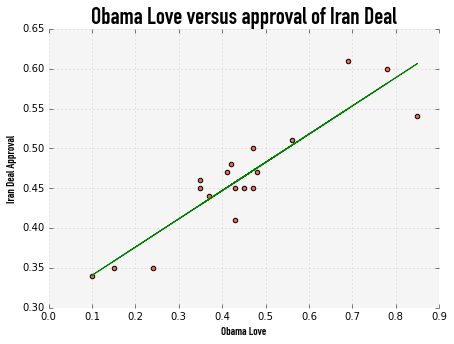

In [165]:
fig, ax = plt.subplots(figsize =(7,5))

#Font
csfont = {'fontname':'DIN Condensed'}

lm = smf.ols(formula='Iran_Deal~Obama',data=df_Obama_Iran_Deal).fit()
lm.params
Intercept, Obama_love = lm.params

df_Obama_Iran_Deal.plot(kind='scatter', x='Obama', y='Iran_Deal', ax= ax, color='tomato')
ax.plot(df_Obama_Iran_Deal["Obama"],Obama_love*df_Obama_Iran_Deal["Obama"]+Intercept,"-",color="green")

ax.set_axis_bgcolor("WhiteSmoke")

ax.set_ylabel('')

ax.xaxis.grid(color='darkgrey', linestyle=':', linewidth=0.5)
ax.yaxis.grid(color='darkgrey', linestyle=':', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    #axis='x',
    top='off',
    which='off',
    left='off',
    right='off',
    bottom='off',
    labeltop='off',
    labelbottom='off')

#labelling, getting rid of boarders
ax.set_xlabel('Obama Love', **csfont, fontsize=12)
ax.set_title("Obama Love versus approval of Iran Deal", **csfont, fontsize=24)
ax.set_ylabel('Iran Deal Approval', **csfont, fontsize=12)

ax.set_axisbelow(True)

# Now for Obama Love and Confidence in Negotiations with Iran

In [166]:
df_Obama.head()

,Unnamed: 0,Approve,Disapprove,(Don't know)
0,Dem,0.78,0.17,0.05
1,Rep,0.10,0.86,0.04
2,Ind,0.37,0.53,0.10
3,Men,0.41,0.53,0.05
4,Women,0.47,0.47,0.06


In [167]:
df_Iran_Nego.head()

,Unnamed: 0,Very confident,Somewhat confident,Not very confident,Not at all confident,(Don't know)
0,Dem,0.29,0.49,0.11,0.08,0.04
1,Rep,0.04,0.13,0.26,0.57,0.01
2,Ind,0.15,0.29,0.22,0.32,0.02
3,Men,0.17,0.28,0.18,0.35,0.02
4,Women,0.17,0.35,0.19,0.27,0.02


In [168]:
df_Iran_Nego['Confident'] = df_Iran_Nego['Very confident'] + df_Iran_Nego['Somewhat confident']

In [169]:
df_Obama_Iran_Nego = df_Obama.merge(df_Iran_Nego, left_on = 'Unnamed: 0', right_on='Unnamed: 0')

In [170]:
del df_Obama_Iran_Nego['Disapprove']
del df_Obama_Iran_Nego["(Don't know)_x"]
del df_Obama_Iran_Nego["Very confident"]
del df_Obama_Iran_Nego["Somewhat confident"]
del df_Obama_Iran_Nego['Not very confident']
del df_Obama_Iran_Nego["Not at all confident"]
del df_Obama_Iran_Nego["(Don't know)_y"]
df_Obama_Iran_Nego.head()

,Unnamed: 0,Approve,Confident
0,Dem,0.78,0.78
1,Rep,0.10,0.17
2,Ind,0.37,0.44
3,Men,0.41,0.45
4,Women,0.47,0.52
5,White,0.35,0.40
6,Black,0.85,0.83
7,College Degree,0.47,0.55
8,No Degree,0.43,0.43
9,under 35,0.56,0.57


In [177]:
df_Obama_Iran_Nego.columns = ['Group', 'ObamaApp', 'Confidence']

In [178]:
df_Obama_Iran_Nego.head()

,Group,ObamaApp,Confidence
0,Dem,0.78,0.78
1,Rep,0.10,0.17
2,Ind,0.37,0.44
3,Men,0.41,0.45
4,Women,0.47,0.52


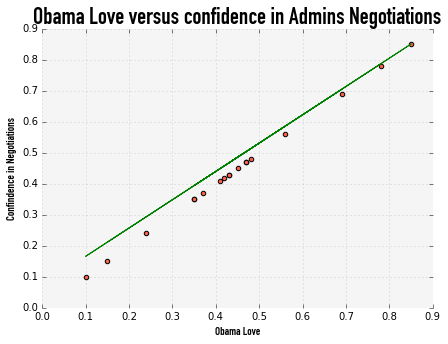

In [179]:
fig, ax = plt.subplots(figsize =(7,5))

#Font
csfont = {'fontname':'DIN Condensed'}

lm = smf.ols(formula='Confidence~ObamaApp',data=df_Obama_Iran_Nego).fit()
lm.params
Intercept, Obama_love = lm.params

df_Obama_Iran_Nego.plot(kind='scatter', x='ObamaApp', y='ObamaApp', ax= ax, color='tomato')
ax.plot(df_Obama_Iran_Nego["ObamaApp"],Obama_love*df_Obama_Iran_Nego["ObamaApp"]+Intercept,"-",color="green")

ax.set_axis_bgcolor("WhiteSmoke")

ax.set_ylabel('')

ax.xaxis.grid(color='darkgrey', linestyle=':', linewidth=0.5)
ax.yaxis.grid(color='darkgrey', linestyle=':', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    #axis='x',
    top='off',
    which='off',
    left='off',
    right='off',
    bottom='off',
    labeltop='off',
    labelbottom='off')

#labelling, getting rid of boarders
ax.set_xlabel('Obama Love', **csfont, fontsize=12)
ax.set_title("Obama Love versus confidence in Admins Negotiations", **csfont, fontsize=24)
ax.set_ylabel('Confindence in Negotiations', **csfont, fontsize=12)

ax.set_axisbelow(True)